In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#Reading the csv file and storing the path in dataSet

dataSet = "C:\\Users\\Pranjal\\Desktop\\Python\\Data_visualization\\imdb_1000.csv"
movies = pd.read_csv(dataSet)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [21]:
#checking the number of rows and columns
movies.shape

(979, 6)

In [22]:
#checking the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [23]:
#calculating the average of duration of movies
movies['duration'].mean()

120.97957099080695

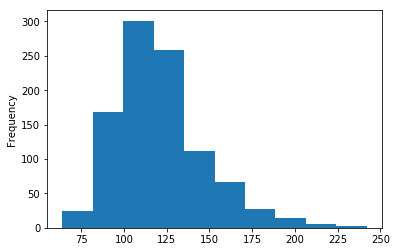

In [27]:
#sort the data frame to find shortest and longest duration movies
movies.sort_values('duration')

#craeting the histogram of duration
movies['duration'].plot(kind='hist', bins=10)


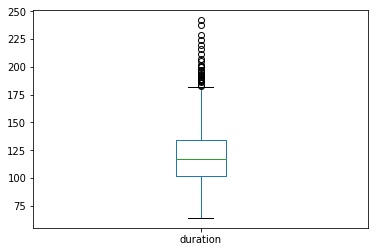

In [28]:
movies['duration'].plot(kind='box')

In [30]:
#count how many movies have each of the content ratings
movies[['content_rating','title']].groupby('content_rating').count()

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


Text(0, 0.5, 'Title count')

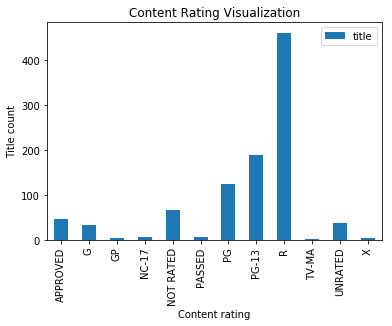

In [32]:
#Visualizing the above data in a bar form

movies[['content_rating','title']].groupby('content_rating').count().plot(kind='bar',title='Content Rating Visualization')
plt.xlabel('Content rating')
plt.ylabel('Title count')

In [36]:
# count the number of missing values in each column
movies.isnull().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [43]:
#displaying the movies which have the null values in content_rating

movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [47]:
#Filling the missing values with the reasonalble values
movies.content_rating.fillna('UNRATED', inplace=True)

In [52]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
dupe_titles = movies[movies.title.duplicated()].title
movies[movies.title.isin(dupe_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
